In [ ]:
!pip install torch torchvision numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Using device: cuda
Training samples: 1500
Testing samples: 250
hello
bye
Epoch 1/20
Train Loss: 2.6047, Train Acc: 0.2567
Val Loss: 2.5776, Val Acc: 0.3400
Saved best model!
Epoch 2/20
Train Loss: 2.4443, Train Acc: 0.3333
Val Loss: 2.4274, Val Acc: 0.5200
Saved best model!
Epoch 3/20
Train Loss: 2.3807, Train Acc: 0.3473
Val Loss: 2.3077, Val Acc: 0.5320
Saved best model!
Epoch 4/20
Train Loss: 2.3913, Train Acc: 0.3580
Val Loss: 2.2586, Val Acc: 0.5600
Saved best model!
Epoch 5/20
Train Loss: 2.3402, Train Acc: 0.3627
Val Loss: 2.1511, Val Acc: 0.5920
Saved best model!
Epoch 6/20
Train Loss: 2.3559, Train Acc: 0.3360
Val Loss: 2.1541, Val Acc: 0.5800
Epoch 7/20
Train Loss: 2.2910, Train Acc: 0.3660
Val Loss: 2.0538, Val Acc: 0.6000
Saved best model!
Epoch 8/20
Train Loss: 2.2703, Train Acc: 0.3860
Val Loss: 2.0361, Val Acc: 0.6560
Saved best model!
Epoch 9/20
Train Loss: 2.2976, Train Acc: 0.3693
Val Loss: 2.0000, Val Acc: 0.6480
Epoch 10/20
Train Loss: 2.2292, Train Acc: 0.4000
Val 

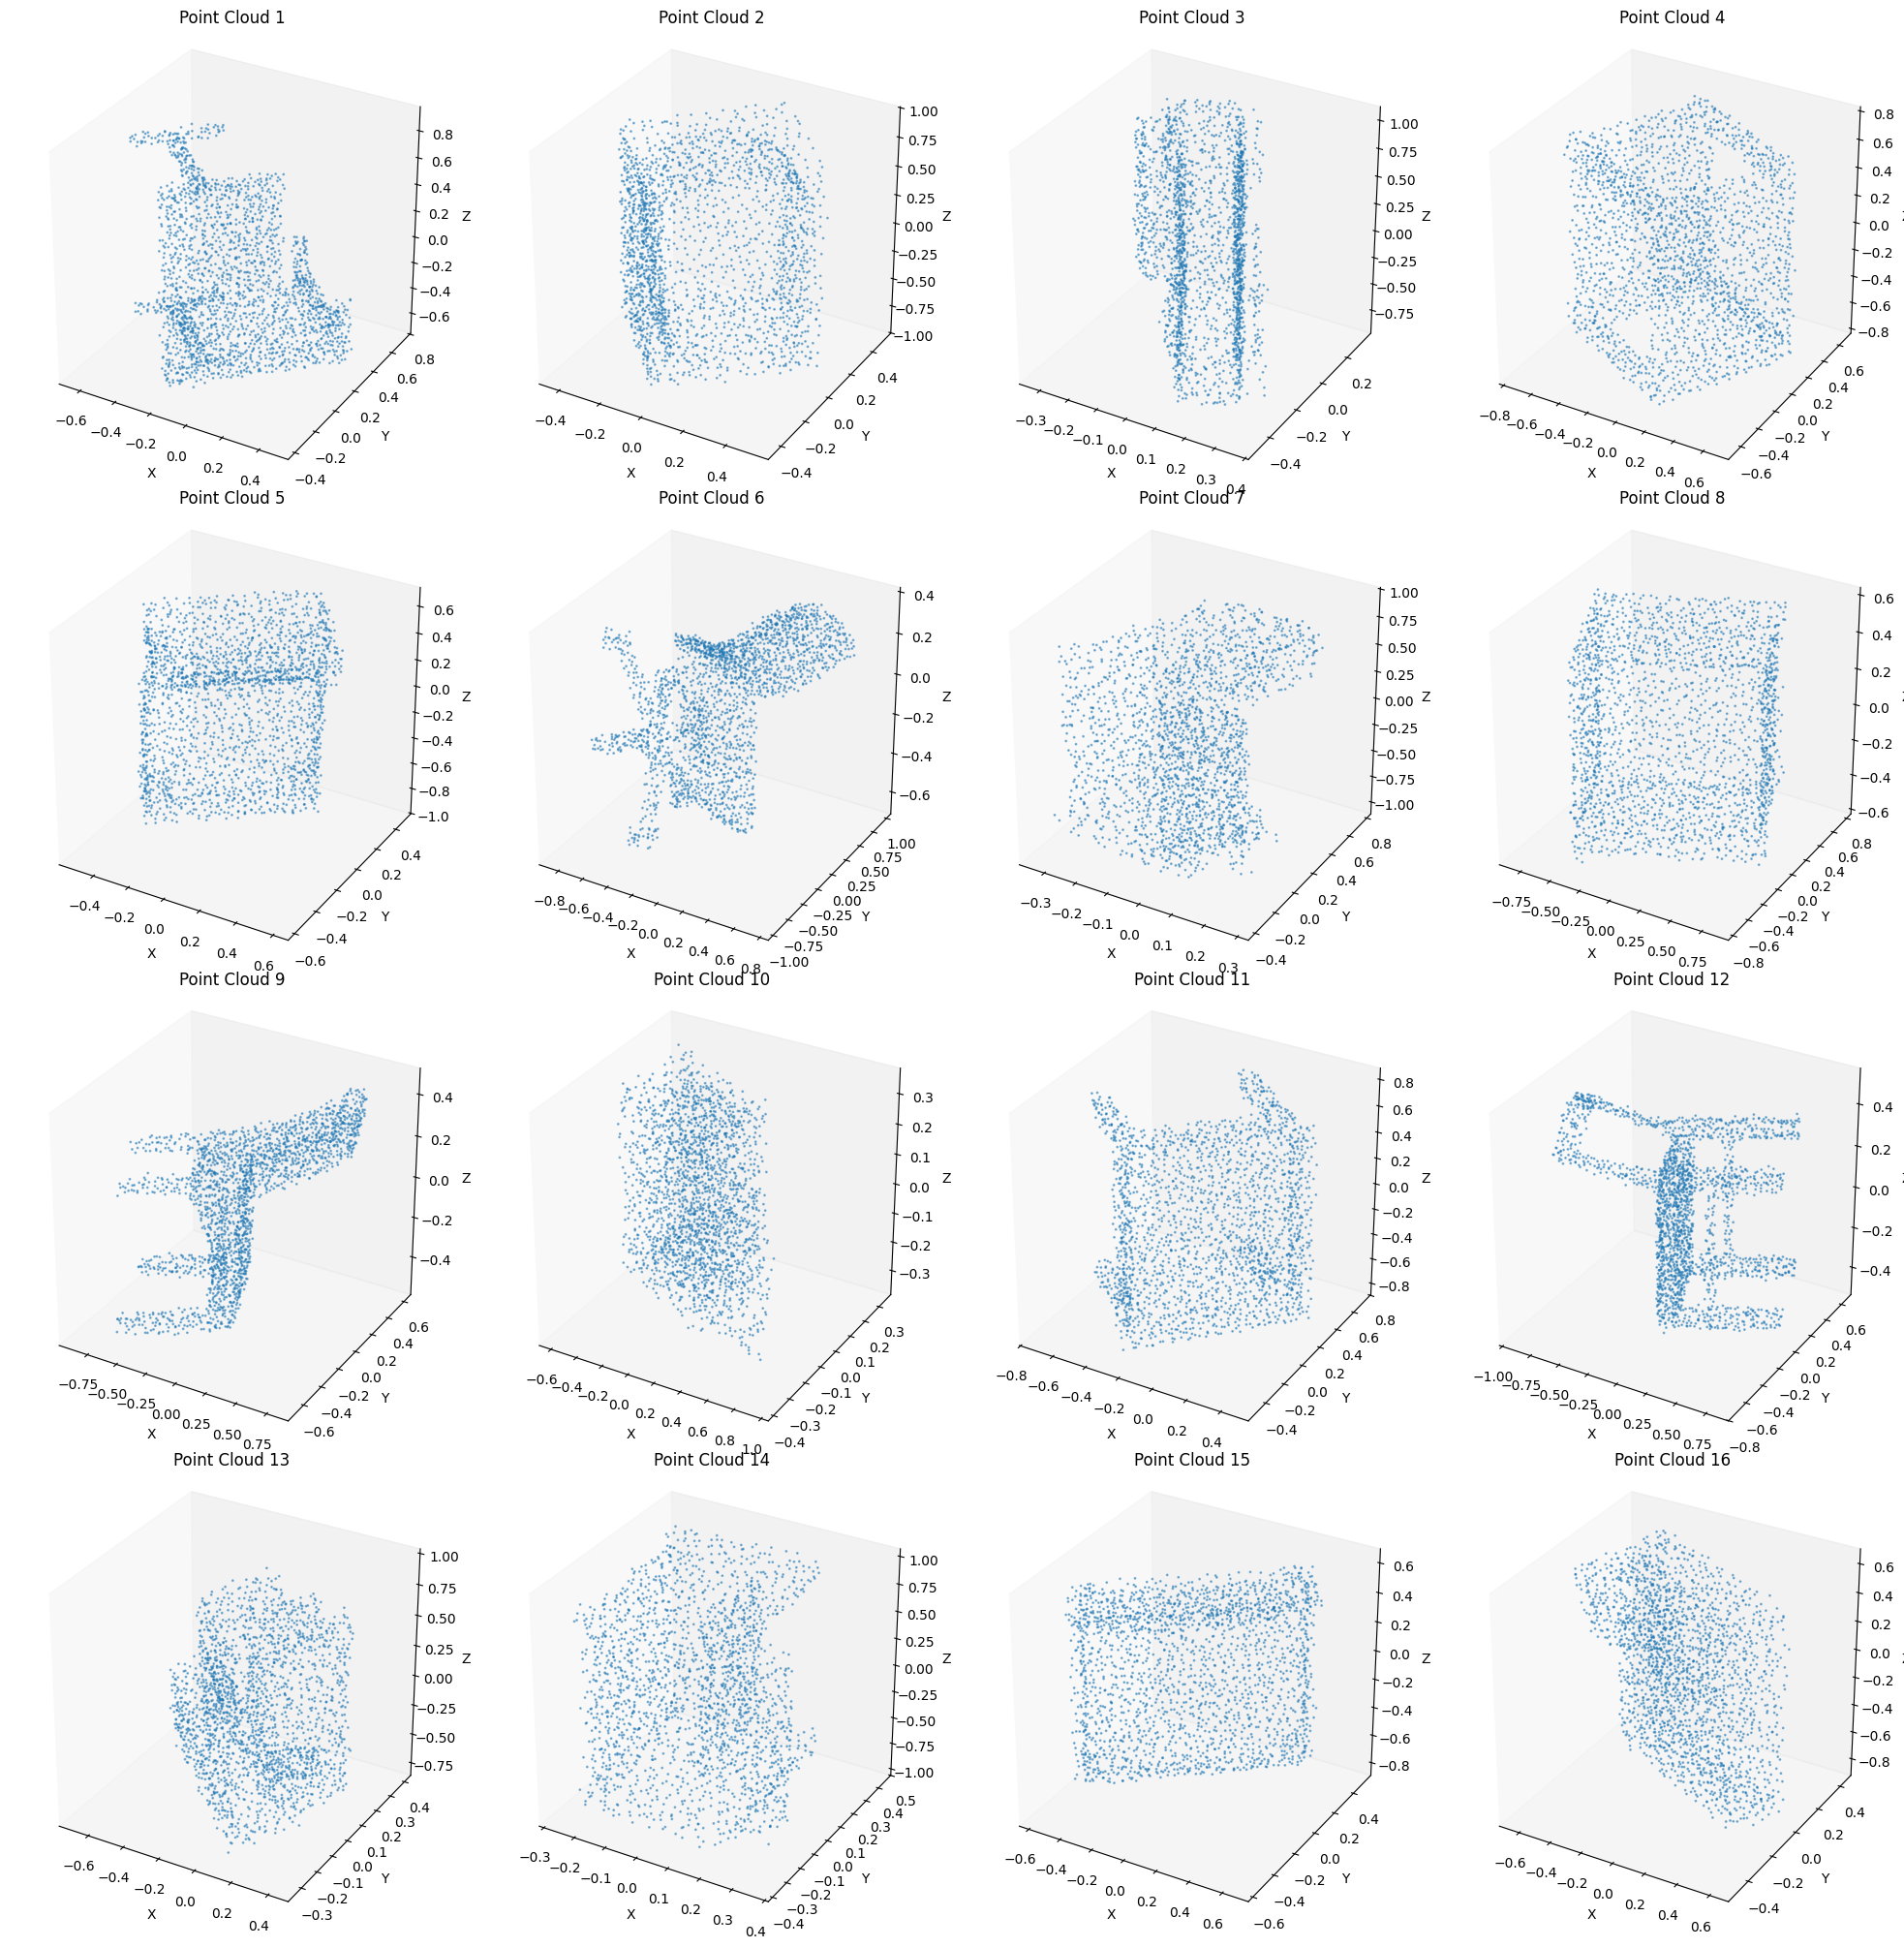

In [ ]:
# Complete the tasks mentioned as "TODO: Task:<>"
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# TODO:Task 1: Import necessary libraries:




# set seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

# visualize point clouds for a batch
def visualize_point_cloud(batch, fig_size=(20, 20)):
    print('hello')
    if torch.is_tensor(batch):
        batch = batch.numpy()

    fig = plt.figure(figsize=fig_size)
    for i in range(16):
        point_cloud = batch[i]
        row = i // 4
        col = i % 4
        # Create 3D subplot
        ax = fig.add_subplot(4, 4, i+1, projection='3d')

        # Extract x, y, z coordinates
        x = point_cloud[:, 0]
        y = point_cloud[:, 1]
        z = point_cloud[:, 2]
        # Plot 3D scatter
        ax.scatter(x, y, z, s=1, alpha=0.5)

        ax.set_title(f'Point Cloud {i+1}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_box_aspect([1, 1, 1])
        ax.grid(False)
    print('bye')
    plt.tight_layout()
    plt.savefig('visualize.jpg', format='jpg',bbox_inches='tight')

# Point Cloud Transforms
class RandomRotation(object):
    def __call__(self, points):
        # Random rotation around z-axis
        theta = np.random.uniform(0, 2*np.pi)
        rotation_matrix = np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]
        ])
        return np.dot(points, rotation_matrix)

class RandomJitter(object):
    def __init__(self, sigma=0.01, clip=0.05):
        self.sigma = sigma
        self.clip = clip

    def __call__(self, points):
        jitter = np.clip(np.random.normal(0, self.sigma, points.shape), -self.clip, self.clip)
        return points + jitter

class ToTensor(object):
    def __call__(self, points):
        return torch.from_numpy(points).float()


# ModelNet10 Dataset
# TODO:Task 2: Define ModelNet10 dataset:
class ModelNet10(torch.utils.data.Dataset):
    def __init__(self, data_path, phase='train', num_points=2048, transforms=None):
        self.data = np.load(os.path.join(data_path, f'points_{phase}.npy'))
        self.labels = np.load(os.path.join(data_path, f'labels_{phase}.npy'))
        self.transforms = transforms

    def __getitem__(self, idx):
        point_cloud = self.data[idx]
        if self.transforms:
            point_cloud = self.transforms(point_cloud)
        return point_cloud, torch.tensor(self.labels[idx], dtype=torch.long)

    def __len__(self):
        return len(self.data)



# TODO:Task 3: Define PointNetClassifier model
class PointNetClassifier(nn.Module):
    def __init__(self, num_channel=3, num_classes=10):
        super(PointNetClassifier, self).__init__()
        self.conv1D1 = torch.nn.Conv1d(num_channel,64,1)
        self.batchNormal1D1 = torch.nn.BatchNorm1d(64)
        self.relu1 = torch.nn.ReLU()
        self.conv1D2 = torch.nn.Conv1d(64,128,1)
        self.batchNormal1D2 = torch.nn.BatchNorm1d(128)
        self.relu2 = torch.nn.ReLU()
        self.conv1D3 = torch.nn.Conv1d(128,1024,1)
        self.batchNormal1D3 = torch.nn.BatchNorm1d(1024)
        self.maxpool = torch.nn.AdaptiveMaxPool1d(1)
        self.fc1 = torch.nn.Linear(1024,512)
        self.dropout1 = torch.nn.Dropout1d(p=0.3)
        self.batchNormal1D4 = torch.nn.BatchNorm1d(512)
        self.relu3 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(512,256)
        self.dropout2 = torch.nn.Dropout1d(p=0.3)
        self.batchNormal1D5 = torch.nn.BatchNorm1d(256)
        self.relu4 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(256,num_classes)
        self.logsoftmax = torch.nn.LogSoftmax(dim=0)






    # hint: NLL loss takes log-softmax as input
    # Use F.log_softmax across proper dimension as the final output
    # use torch max along proper dimension for maxpool
    def forward(self, x):
        output = self.conv1D1(x)
        output = self.batchNormal1D1(output)
        output = self.relu1(output)
        output = self.conv1D2(output)
        output = self.batchNormal1D2(output)
        output = self.relu2(output)
        output = self.conv1D3(output)
        output = self.batchNormal1D3(output)
        output = self.maxpool(output)
        output = torch.squeeze(output)
        # print(output.shape)
        output = self.fc1(output)
        output = self.dropout1(output)
        # print(output.shape)
        output = self.batchNormal1D4(output)
        output = self.relu3(output)
        output = self.fc2(output)
        output = self.dropout2(output)
        output = self.batchNormal1D5(output)
        output = self.relu4(output)
        output = self.fc3(output)
        output = self.logsoftmax(output)
        return output



# TODO:Task 4:Training function
# hint:check dimension of inputs and labels while calculating loss
# use torch.transpose() and torch.squeeze() if needed
# function should return train loss and train accuracy
# print training loss after each batch for sanity check
def train(model, train_loader, optimizer, criterion, device='cpu'):
    model.train()
    model.to(device)
    total_loss, correct = 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        inputs = torch.permute(inputs, (0, 2, 1))
        labels = labels.squeeze()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(dim=1) == labels).sum().item()

    return total_loss / len(train_loader), correct / len(train_loader.dataset)



# TODO:Task 5: Evaluation function
# hint:check dimension of inputs and labels while calculating loss
# use torch.transpose() and torch.squeeze() if needed
# function should return test loss and test accuracy

def evaluate(model, val_loader, criterion, device):
    model.eval()
    model.to(device)
    total_loss, correct = 0, 0

    with torch.no_grad():
        for inputs, labels in
        :
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = torch.permute(inputs, (0, 2, 1))
            labels = labels.squeeze()
            outputs = model(inputs)

            total_loss += criterion(outputs, labels).item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()

    return total_loss / len(val_loader), correct / len(val_loader.dataset)



def main():
    # TODO: Task 6: Initialize necessary components
    # 'Path to ModelNet10 dataset'
    data_path = './'
    # 'Number of training epochs'
    epochs = 20
    # 'Learning rate'
    lr = 1e-3

    # 'Batch size'
    batch_size = 16
    # 'Number of points in each point cloud'
    num_points = 2048
    # 'Random seed'
    seed = 42

    set_seed(seed)

    # Force CPU usage

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Data transforms
    # TODO:Task 7: Complete train_transform and test transform code:
    # train transform: Random rotation, jitter and convert to tensor
    # test trasnfrom = convert to tensor
    train_transform = transforms.Compose([
            RandomRotation(),
            RandomJitter(),
            ToTensor()
        ])


    test_transform = transforms.Compose([
        ToTensor()
        ])


    # TODO:Task 8 Load dataset and dataloader :
    train_dataset = ModelNet10(data_path,phase='train',transforms=train_transform)

    test_dataset = ModelNet10(data_path,phase='test',transforms=test_transform)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)

    print(f"Training samples: {len(train_dataset)}")
    print(f"Testing samples: {len(test_dataset)}")

    #if you keep batch size other than 16, comment out visualize_point_cloud part
    for batch,_ in train_loader:
        visualize_point_cloud(batch)
        break

    # Initialize model
    model = PointNetClassifier().to(device)
    criterion = nn.NLLLoss()

    # TODO:Task 9 optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)


    # Training loop
    best_acc = 0.0
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        val_loss, val_acc = evaluate(model, test_loader, criterion, device)
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print("Saved best model!")

    print(f"Best validation accuracy: {best_acc:.4f}")

    # TODO:Task 10 Congrats, no more tasks #WOW

if __name__ == "__main__":
    main()